<a href="https://colab.research.google.com/github/Seif-Sameh/Restaurants-inspection-results/blob/main/Data_science_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import files

# Importing Dataset

In [ ]:
df = pd.read_csv('/content/resturants inspection results.csv', on_bad_lines='skip', quoting= 3)

# Exploring Data

In [ ]:
df.shape

(4988, 27)

In [ ]:
df.isna().sum()

CAMIS                       0
DBA                       220
BORO                        0
BUILDING                   25
STREET                      5
ZIPCODE                    89
PHONE                       0
CUISINE DESCRIPTION       751
INSPECTION DATE             0
ACTION                    751
VIOLATION CODE            866
VIOLATION DESCRIPTION     866
CRITICAL FLAG               0
SCORE                     935
GRADE                    3052
GRADE DATE               3185
RECORD DATE                 0
INSPECTION TYPE           751
Latitude                   25
Longitude                  25
Community Board           119
Council District          119
Census Tract              119
BIN                       139
BBL                        35
NTA                       119
Location Point1;;;        512
dtype: int64

In [ ]:
df.duplicated().sum()

1

# Data Pre-processing

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.drop(columns=['GRADE', 'GRADE DATE', 'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA', 'Location Point1;;;'], inplace=True)

<ipython-input-47-45718e97237f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['GRADE', 'GRADE DATE', 'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA', 'Location Point1;;;'], inplace=True)


In [ ]:
df.dropna(subset=['INSPECTION TYPE' ,'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'DBA', 'CUISINE DESCRIPTION', 'ACTION', 'Latitude', 'Longitude'], inplace=True)

<ipython-input-48-abbd40070d3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['INSPECTION TYPE' ,'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'DBA', 'CUISINE DESCRIPTION', 'ACTION', 'Latitude', 'Longitude'], inplace=True)


In [ ]:
df['SCORE'] = df['SCORE'].fillna(50)

<ipython-input-49-d11c2dfa0f12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCORE'] = df['SCORE'].fillna(50)


In [ ]:
df.isna().sum()

CAMIS                     0
DBA                       0
BORO                      0
BUILDING                  3
STREET                    0
ZIPCODE                  56
PHONE                     0
CUISINE DESCRIPTION       0
INSPECTION DATE           0
ACTION                    0
VIOLATION CODE            0
VIOLATION DESCRIPTION     0
CRITICAL FLAG             0
SCORE                     0
RECORD DATE               0
INSPECTION TYPE           0
Latitude                  0
Longitude                 0
dtype: int64

In [ ]:
df.shape

(4113, 18)

In [ ]:
df['ZIPCODE'] = df['ZIPCODE'].fillna(0)
df['BUILDING'] = df['BUILDING'].fillna(0)

<ipython-input-52-be810d36f7d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ZIPCODE'] = df['ZIPCODE'].fillna(0)
<ipython-input-52-be810d36f7d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BUILDING'] = df['BUILDING'].fillna(0)


In [ ]:
df.isna().sum()

CAMIS                    0
DBA                      0
BORO                     0
BUILDING                 0
STREET                   0
ZIPCODE                  0
PHONE                    0
CUISINE DESCRIPTION      0
INSPECTION DATE          0
ACTION                   0
VIOLATION CODE           0
VIOLATION DESCRIPTION    0
CRITICAL FLAG            0
SCORE                    0
RECORD DATE              0
INSPECTION TYPE          0
Latitude                 0
Longitude                0
dtype: int64

In [ ]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude
32,50118403,NEW LUCKY STAR KITCHEN,Queens,809,ASTORIA BLVD,11102.0,7187772200,Chinese,01/11/2022,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,20.0,04/29/2024,Pre-permit (Operational) / Initial Inspection,40.772568,-73.932254
35,50108139,NHA MINH,Queens,915,WYCKOFF AVENUE,11385.0,9176745706,Other,11/28/2023,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,Critical,10.0,04/29/2024,Cycle Inspection / Initial Inspection,40.696932,-73.906442
38,41050702,CHRIS SUPER DELI,Bronx,903,SHERIDAN AVENUE,10451.0,7184100708,Sandwiches/Salads/Mixed Buffet,02/07/2022,Violations were cited in the following area(s).,09B,Thawing procedures improper.,Not Critical,12.0,04/29/2024,Cycle Inspection / Initial Inspection,40.827086,-73.920773
42,41466245,ATLIXCO BAKERY & DELI,Staten Island,1012,ST PAULS AVE,0.0,7183900171,Mexican,04/22/2024,Violations were cited in the following area(s).,04L,Evidence of mice or live mice in establishment...,Critical,17.0,04/29/2024,Cycle Inspection / Initial Inspection,0.000000,0.000000
46,50064785,REGINA'S GROCERY,Manhattan,27,ORCHARD STREET,10002.0,9172615792,Italian,03/19/2024,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,Critical,12.0,04/29/2024,Cycle Inspection / Re-inspection,40.715511,-73.991581


# Categorical Values Encoding

In [ ]:
print(df['ACTION'].value_counts())

ACTION
Violations were cited in the following area(s).                                                                                       3942
Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.     144
Establishment re-opened by DOHMH.                                                                                                       25
No violations were recorded at the time of this inspection.                                                                              2
Name: count, dtype: int64


In [ ]:
print(df['VIOLATION CODE'].value_counts())

VIOLATION CODE
02B      616
04L      584
02G      525
10B      485
08A      330
        ... 
15-27      1
15I        1
19-05      1
15E2       1
15F1       1
Name: count, Length: 62, dtype: int64


In [ ]:
print(df['INSPECTION TYPE'].value_counts())

INSPECTION TYPE
Cycle Inspection / Initial Inspection                          2261
Cycle Inspection / Re-inspection                                779
Pre-permit (Operational) / Initial Inspection                   592
Pre-permit (Operational) / Re-inspection                        217
Administrative Miscellaneous / Initial Inspection               100
Pre-permit (Non-operational) / Initial Inspection                41
Pre-permit (Operational) / Compliance Inspection                 33
Administrative Miscellaneous / Re-inspection                     22
Cycle Inspection / Reopening Inspection                          17
Cycle Inspection / Compliance Inspection                         14
Smoke-Free Air Act / Initial Inspection                          13
Pre-permit (Operational) / Reopening Inspection                  11
Inter-Agency Task Force / Initial Inspection                      4
Administrative Miscellaneous / Compliance Inspection              3
Pre-permit (Operational) / Secon

In [ ]:
le = LabelEncoder()
df['CRITICAL FLAG ENCODED'] = le.fit_transform(df['CRITICAL FLAG'])
df['ACTION_ENCODED'] = le.fit_transform(df['ACTION'])
df['VIOLATION CODE ENCODED'] = le.fit_transform(df['VIOLATION CODE'])
df['INSPECTION TYPE ENCODED'] = le.fit_transform(df['INSPECTION TYPE'])

In [ ]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,CRITICAL FLAG,SCORE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,CRITICAL FLAG ENCODED,ACTION_ENCODED,VIOLATION CODE ENCODED,INSPECTION TYPE ENCODED
32,50118403,NEW LUCKY STAR KITCHEN,Queens,809,ASTORIA BLVD,11102.0,7187772200,Chinese,01/11/2022,Violations were cited in the following area(s).,...,Critical,20.0,04/29/2024,Pre-permit (Operational) / Initial Inspection,40.772568,-73.932254,0,3,1,14
35,50108139,NHA MINH,Queens,915,WYCKOFF AVENUE,11385.0,9176745706,Other,11/28/2023,Violations were cited in the following area(s).,...,Critical,10.0,04/29/2024,Cycle Inspection / Initial Inspection,40.696932,-73.906442,0,3,1,7
38,41050702,CHRIS SUPER DELI,Bronx,903,SHERIDAN AVENUE,10451.0,7184100708,Sandwiches/Salads/Mixed Buffet,02/07/2022,Violations were cited in the following area(s).,...,Not Critical,12.0,04/29/2024,Cycle Inspection / Initial Inspection,40.827086,-73.920773,2,3,27,7
42,41466245,ATLIXCO BAKERY & DELI,Staten Island,1012,ST PAULS AVE,0.0,7183900171,Mexican,04/22/2024,Violations were cited in the following area(s).,...,Critical,17.0,04/29/2024,Cycle Inspection / Initial Inspection,0.000000,0.000000,0,3,13,7
46,50064785,REGINA'S GROCERY,Manhattan,27,ORCHARD STREET,10002.0,9172615792,Italian,03/19/2024,Violations were cited in the following area(s).,...,Critical,12.0,04/29/2024,Cycle Inspection / Re-inspection,40.715511,-73.991581,0,3,1,8


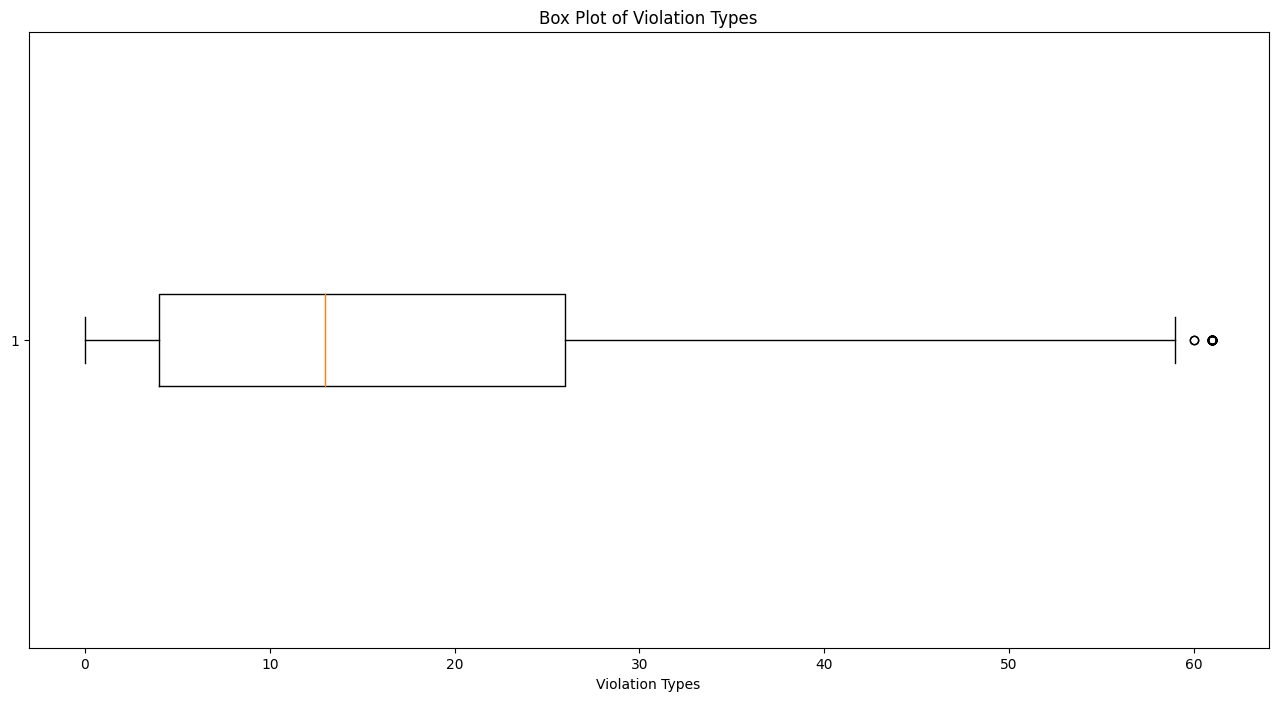

In [ ]:
plt.figure(figsize=(16, 8))
plt.boxplot(df['VIOLATION CODE ENCODED'], vert=False)
plt.xlabel('Violation Types')
plt.title('Box Plot of Violation Types')
plt.show()

In [ ]:
column_name = 'VIOLATION CODE ENCODED'
z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()

threshold = 2

df_no_outliers = df[abs(z_scores) < threshold]

print(df_no_outliers)


         CAMIS                       DBA           BORO BUILDING  \
32    50118403    NEW LUCKY STAR KITCHEN         Queens      809   
35    50108139                  NHA MINH         Queens      915   
38    41050702          CHRIS SUPER DELI          Bronx      903   
42    41466245     ATLIXCO BAKERY & DELI  Staten Island     1012   
46    50064785          REGINA'S GROCERY      Manhattan       27   
...        ...                       ...            ...      ...   
4983  50066224                PATISSERIE      Manhattan      225   
4984  50018547        MANDEVILLES BISTRO       Brooklyn      944   
4985  50017098             ZUMA NEW YORK      Manhattan      261   
4986  41254923      AYZA CAFE & WINE BAR      Manhattan       11   
4987  50053669  FAMOUS CALABRIA PIZZERIA      Manhattan       27   

                 STREET  ZIPCODE       PHONE             CUISINE DESCRIPTION  \
32         ASTORIA BLVD  11102.0  7187772200                         Chinese   
35       WYCKOFF AVENUE

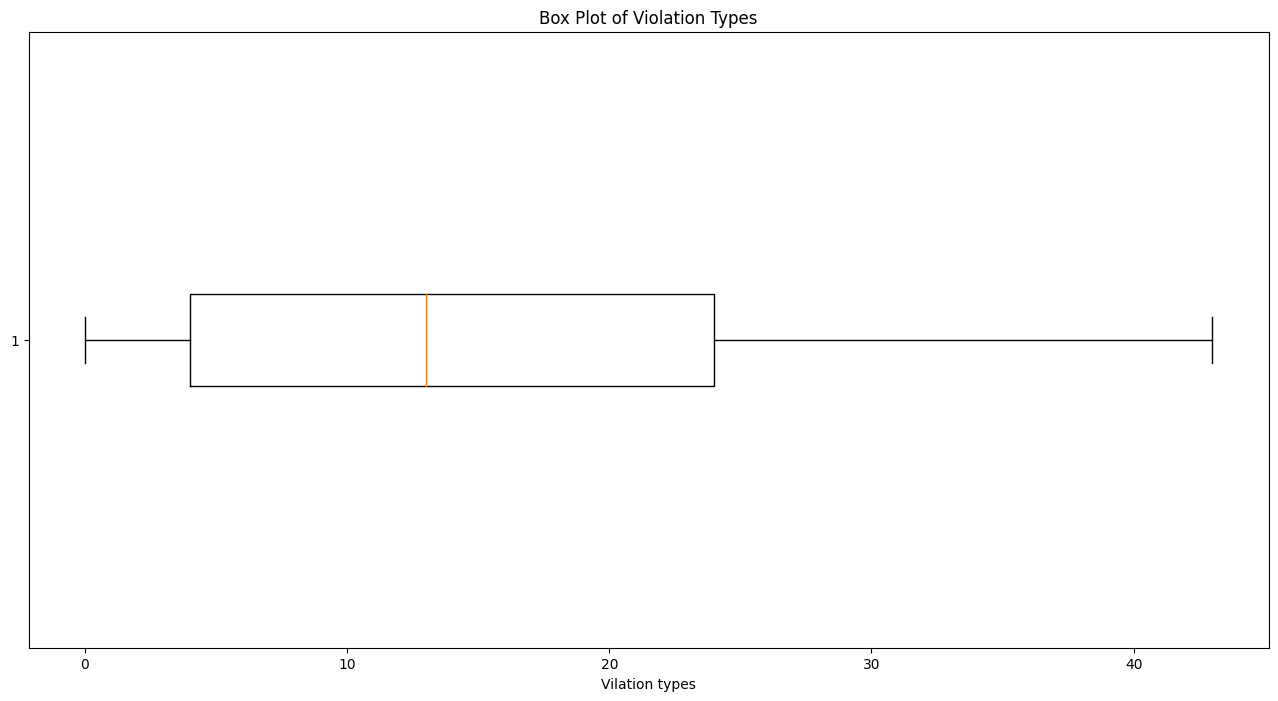

In [ ]:
plt.figure(figsize=(16, 8))
plt.boxplot(df_no_outliers['VIOLATION CODE ENCODED'], vert=False)
plt.xlabel('Vilation types')
plt.title('Box Plot  of Violation Types')
plt.show()

In [ ]:
df_no_outliers.to_csv('manipulated_dataset.csv', index=False)

files.download('manipulated_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Prediction Models



In [ ]:
x = df_no_outliers[['ACTION_ENCODED','CRITICAL FLAG ENCODED', 'SCORE']]
y = df_no_outliers['VIOLATION CODE ENCODED']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3 ,random_state=125)
print('Number of rows in the total set: {}'.format(df_no_outliers.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 3942
Number of rows in the training set: 2759
Number of rows in the test set: 1183


In [ ]:
from sklearn.linear_model import LinearRegression
regressor_model = LinearRegression()
regressor_model.fit(X_train, y_train)
y_pred = regressor_model.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(y_test.shape)
print(y_pred.shape)

Mean Absolute Error: 4.864889759040954
Mean Squared Error: 32.10646376755725
Root Mean Squared Error: 5.6662565921035775
(1183,)
(1183,)


In [ ]:
y_test_array = y_test.to_numpy()

y_test_array = y_test_array.reshape(1, 1183)

y_pred = y_pred.reshape(1, 1183)

y_test_array = y_test_array.flatten()
y_pred = y_pred.flatten()

df_prediction = pd.DataFrame({'Actual': y_test_array, 'Predicted': y_pred})

print(df_prediction)

      Actual  Predicted
0         13   8.826127
1         12   8.822030
2         13   8.811787
3         13   8.815884
4         14   8.803592
...      ...        ...
1178       4   8.793348
1179       1   8.787202
1180       4   8.785154
1181       1   8.807689
1182      34  28.370704

[1183 rows x 2 columns]


In [ ]:
r2_score(y_test_array,y_pred)

0.7254558837124034

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_pred = regressor_model.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(y_test.shape)
print(y_pred.shape)

Mean Absolute Error: 4.864889759040954
Mean Squared Error: 32.10646376755725
Root Mean Squared Error: 5.6662565921035775
(1183,)
(1183,)


In [ ]:
y_test_array = y_test.to_numpy()

y_test_array = y_test_array.reshape(1, 1183)

y_pred = y_pred.reshape(1, 1183)

y_test_array = y_test_array.flatten()
y_pred = y_pred.flatten()

df_prediction = pd.DataFrame({'Actual': y_test_array, 'Predicted': y_pred})

print(df_prediction)

      Actual  Predicted
0         13   8.826127
1         12   8.822030
2         13   8.811787
3         13   8.815884
4         14   8.803592
...      ...        ...
1178       4   8.793348
1179       1   8.787202
1180       4   8.785154
1181       1   8.807689
1182      34  28.370704

[1183 rows x 2 columns]


In [ ]:
r2_score(y_test_array,y_pred)

0.7254558837124034

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor_model.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(y_test.shape)
print(y_pred.shape)

Mean Absolute Error: 4.864889759040954
Mean Squared Error: 32.10646376755725
Root Mean Squared Error: 5.6662565921035775
(1183,)
(1183,)


In [ ]:
y_test_array = y_test.to_numpy()

y_test_array = y_test_array.reshape(1, 1183)

y_pred = y_pred.reshape(1, 1183)

y_test_array = y_test_array.flatten()
y_pred = y_pred.flatten()

df_prediction = pd.DataFrame({'Actual': y_test_array, 'Predicted': y_pred})

print(df_prediction)

      Actual  Predicted
0         13   8.826127
1         12   8.822030
2         13   8.811787
3         13   8.815884
4         14   8.803592
...      ...        ...
1178       4   8.793348
1179       1   8.787202
1180       4   8.785154
1181       1   8.807689
1182      34  28.370704

[1183 rows x 2 columns]


In [ ]:
r2_score(y_test_array,y_pred)

0.7254558837124034

# Classification Models

In [ ]:
df_no_outliers.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,CRITICAL FLAG,SCORE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,CRITICAL FLAG ENCODED,ACTION_ENCODED,VIOLATION CODE ENCODED,INSPECTION TYPE ENCODED
32,50118403,NEW LUCKY STAR KITCHEN,Queens,809,ASTORIA BLVD,11102.0,7187772200,Chinese,01/11/2022,Violations were cited in the following area(s).,...,Critical,20.0,04/29/2024,Pre-permit (Operational) / Initial Inspection,40.772568,-73.932254,0,3,1,14
35,50108139,NHA MINH,Queens,915,WYCKOFF AVENUE,11385.0,9176745706,Other,11/28/2023,Violations were cited in the following area(s).,...,Critical,10.0,04/29/2024,Cycle Inspection / Initial Inspection,40.696932,-73.906442,0,3,1,7
38,41050702,CHRIS SUPER DELI,Bronx,903,SHERIDAN AVENUE,10451.0,7184100708,Sandwiches/Salads/Mixed Buffet,02/07/2022,Violations were cited in the following area(s).,...,Not Critical,12.0,04/29/2024,Cycle Inspection / Initial Inspection,40.827086,-73.920773,2,3,27,7
42,41466245,ATLIXCO BAKERY & DELI,Staten Island,1012,ST PAULS AVE,0.0,7183900171,Mexican,04/22/2024,Violations were cited in the following area(s).,...,Critical,17.0,04/29/2024,Cycle Inspection / Initial Inspection,0.000000,0.000000,0,3,13,7
46,50064785,REGINA'S GROCERY,Manhattan,27,ORCHARD STREET,10002.0,9172615792,Italian,03/19/2024,Violations were cited in the following area(s).,...,Critical,12.0,04/29/2024,Cycle Inspection / Re-inspection,40.715511,-73.991581,0,3,1,8


In [ ]:
from sklearn.naive_bayes import GaussianNB

x = df_no_outliers[['ACTION_ENCODED', 'SCORE', 'INSPECTION TYPE ENCODED']]
y = df_no_outliers['CRITICAL FLAG']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.687235841081995
Classification Report:
                precision    recall  f1-score   support

      Critical       0.69      1.00      0.81       809
Not Applicable       1.00      1.00      1.00         4
  Not Critical       0.00      0.00      0.00       370

      accuracy                           0.69      1183
     macro avg       0.56      0.67      0.60      1183
  weighted avg       0.47      0.69      0.56      1183



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

x = df_no_outliers[['ACTION_ENCODED', 'SCORE', 'INSPECTION TYPE ENCODED']]
y = df_no_outliers['CRITICAL FLAG']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.687235841081995
Classification Report:
                precision    recall  f1-score   support

      Critical       0.69      1.00      0.81       809
Not Applicable       1.00      1.00      1.00         4
  Not Critical       0.00      0.00      0.00       370

      accuracy                           0.69      1183
     macro avg       0.56      0.67      0.60      1183
  weighted avg       0.47      0.69      0.56      1183



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

x = df_no_outliers[['ACTION_ENCODED', 'SCORE', 'INSPECTION TYPE ENCODED']]
y = df_no_outliers['CRITICAL FLAG']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

n_neighbors = 5
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.6796280642434489
Classification Report:
                precision    recall  f1-score   support

      Critical       0.71      0.90      0.79       809
Not Applicable       1.00      1.00      1.00         4
  Not Critical       0.47      0.20      0.28       370

      accuracy                           0.68      1183
     macro avg       0.73      0.70      0.69      1183
  weighted avg       0.64      0.68      0.63      1183

